In [107]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [50]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
ds.shape

(1599, 12)

In [52]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
ds.columns = ds.columns.str.replace(' ', '_')
ds.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [55]:
ds.isnull().sum()     #no Missing Values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

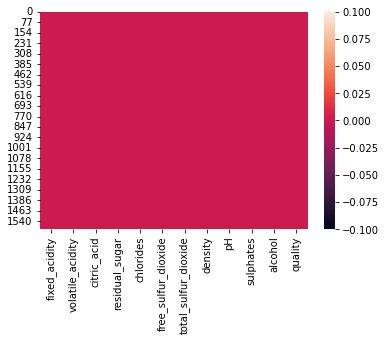

In [56]:
sns.heatmap(ds.isnull())

In [57]:
ds.duplicated().sum()

240

<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>

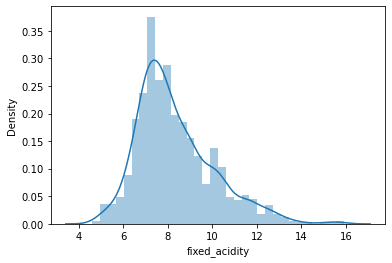

In [58]:
 sns.distplot(ds['fixed_acidity'])

<AxesSubplot:xlabel='volatile_acidity', ylabel='Density'>

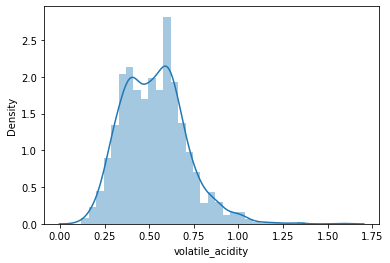

In [59]:
 sns.distplot(ds['volatile_acidity'])

<AxesSubplot:xlabel='citric_acid', ylabel='Density'>

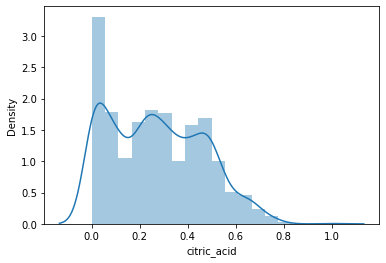

In [60]:
 sns.distplot(ds['citric_acid'])

In [61]:
ds.quality.value_counts(sort=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

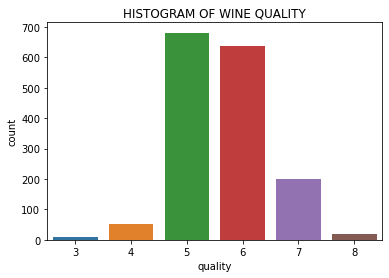

In [62]:
plt = sns.countplot(x='quality',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

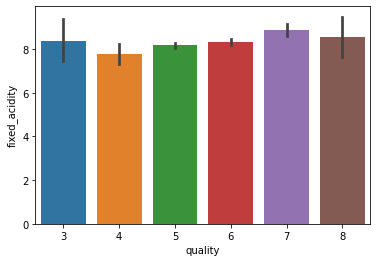

In [63]:
sns.barplot(x='quality',y='fixed_acidity',data=ds)
#fixed_acidity doesnot have impact on quality of wine

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

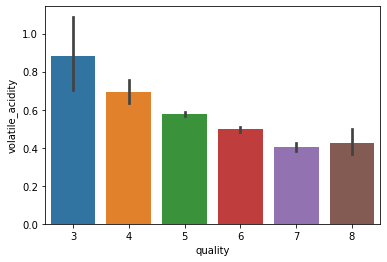

In [64]:
sns.barplot(x='quality',y='volatile_acidity',data=ds)
#Volatile acidity has negative relation with quality.

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

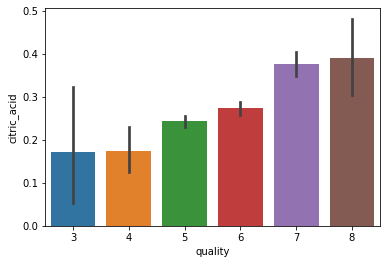

In [65]:
sns.barplot(x='quality',y='citric_acid',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

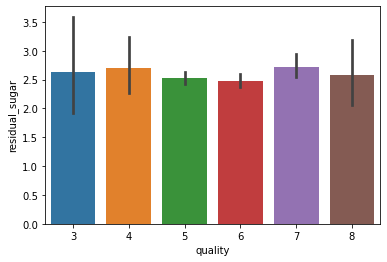

In [66]:
sns.barplot(x='quality',y='residual_sugar',data=ds)
#Residual sugar have no impact on the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

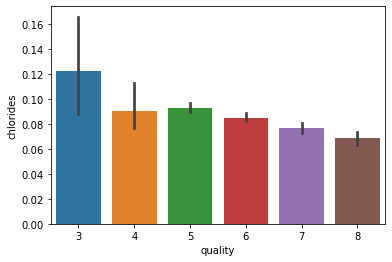

In [67]:
sns.barplot(x='quality',y='chlorides',data=ds)
#Increase in chlorides will decrease the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

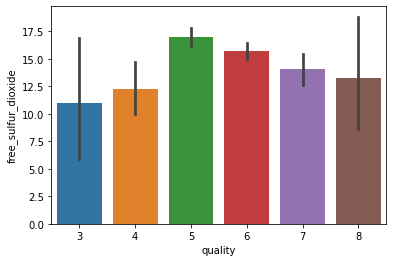

In [68]:
sns.barplot(x='quality',y='free_sulfur_dioxide',data=ds)
#free sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

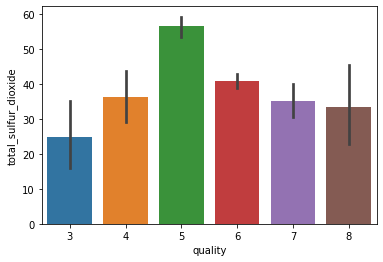

In [69]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=ds)
#total sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

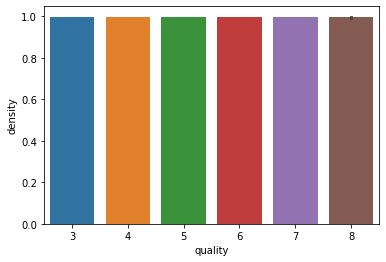

In [70]:
sns.barplot(x='quality',y='density',data=ds)
#Density has no corelation with quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

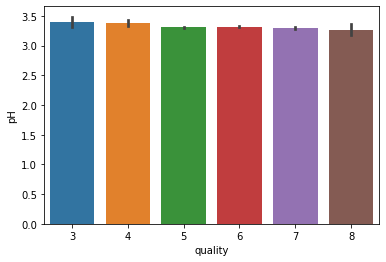

In [71]:
sns.barplot(x='quality',y='pH',data=ds)
#PH no corealtion with quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

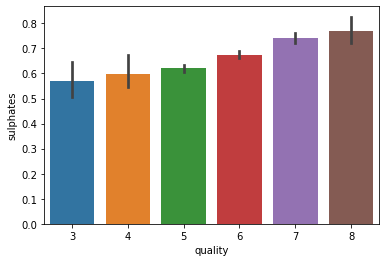

In [72]:
sns.barplot(x='quality',y='sulphates',data=ds)
#sulphate increases quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

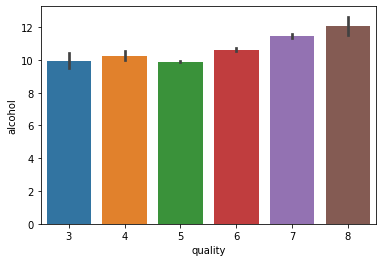

In [73]:
sns.barplot(x='quality',y='alcohol',data=ds)
#ncrease in alcohol quality will improve.

In [74]:
ds_quality = {3:'bad', 4:'bad',5:'bad',6:'bad',7:'good',8:'good'}
ds['quality2'] = ds.quality.map(ds_quality)
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [75]:
le = LabelEncoder()
ds['quality2']=le.fit_transform(ds['quality2'])
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

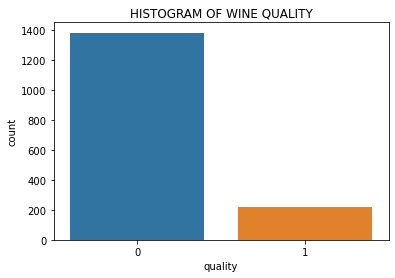

In [76]:
plt = sns.countplot(x='quality2',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:>

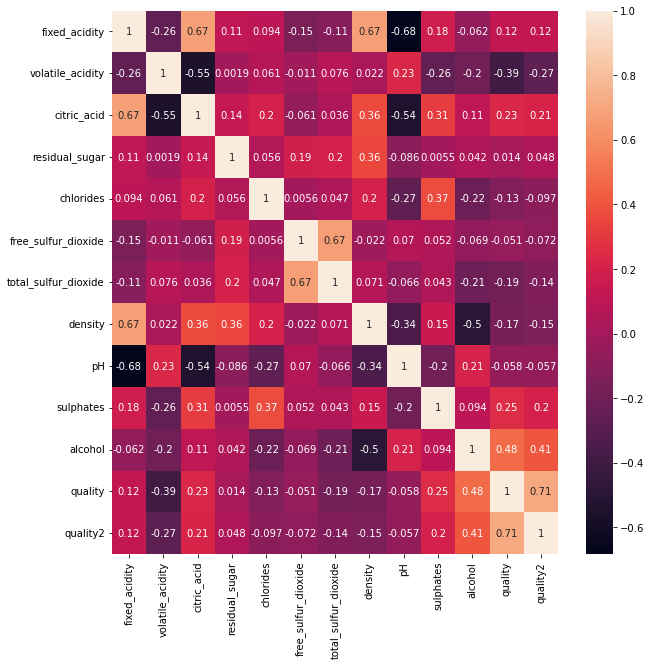

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(),color ='k',annot=True)

In [78]:
dszscore=np.abs(zscore(ds))

In [79]:
print(np.where(dszscore>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [80]:
dsnew=ds[(dszscore<3).all(axis=1)]
print('dfnew.shape=',dsnew.shape)
ds=dsnew

dfnew.shape= (1451, 13)


In [81]:
ds.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
fixed_acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163,0.125791
volatile_acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443,-0.267836
citric_acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999,0.227633
residual_sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787,-0.112080
free_sulfur_dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202,-0.086402
total_sulfur_dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567,0.310432


In [82]:
ds.skew()

fixed_acidity           0.823934
volatile_acidity        0.380659
citric_acid             0.291297
residual_sugar          2.456107
chlorides               2.275162
free_sulfur_dioxide     0.869250
total_sulfur_dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
quality2                2.094941
dtype: float64

In [83]:
from sklearn.preprocessing import power_transform
x_new = power_transform(ds)

In [84]:
ds=pd.DataFrame(x_new ,columns = ds.columns)
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369,-0.400999
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340,-0.833369,-0.400999
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340,-0.833369,-0.400999
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340,0.502485,-0.400999
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369,-0.400999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037,-0.833369,-0.400999
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563,0.502485,-0.400999
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882,0.502485,-0.400999
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166,-0.833369,-0.400999


In [85]:
ds.skew()

fixed_acidity           0.018666
volatile_acidity        0.004945
citric_acid             0.018049
residual_sugar         -0.004606
chlorides              -0.114658
free_sulfur_dioxide    -0.021455
total_sulfur_dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
quality                 0.002703
quality2                2.094941
dtype: float64

In [86]:
x = ds.drop (['quality'], axis = 1)

In [87]:
x = ds.drop (['citric_acid'], axis = 1)

In [88]:
#to check if skweness is lying between -0.5 to 0.5
ds.skew()[np.abs(ds.skew()) < 0.5].all()

True

In [89]:
x=ds.iloc[:,0:-1]
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340,-0.833369
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340,-0.833369
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340,0.502485
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037,-0.833369
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563,0.502485
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882,0.502485
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166,-0.833369


In [90]:
y=ds.iloc[:,-1]
y

0      -0.400999
1      -0.400999
2      -0.400999
3      -0.400999
4      -0.400999
          ...   
1446   -0.400999
1447   -0.400999
1448   -0.400999
1449   -0.400999
1450   -0.400999
Name: quality2, Length: 1451, dtype: float64

In [91]:
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
x.shape

(1451, 12)

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [98]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1006,-0.794377,1.004109,-1.045257,0.514659,0.671179,0.238587,-0.764233,-0.571742,0.469341,-0.206660,0.976444,0.502485
1281,1.079857,-1.260258,1.562056,0.031772,-0.083910,-1.915030,-1.235889,1.556391,-0.816507,1.112589,-0.812371,-0.833369
1127,0.164908,0.292638,-0.144923,0.367978,0.206563,-0.383120,1.336987,0.928501,0.399508,-0.029485,-0.962968,-0.833369
741,-1.885464,0.575521,-0.980170,-0.161553,-0.466841,0.342117,-0.573334,-1.737804,1.695929,1.053277,0.823756,0.502485
655,0.578983,-0.312003,-0.090136,0.886662,0.718578,1.291102,1.632778,0.928501,-1.558502,-0.589657,-1.457471,-0.833369
...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.970066,0.519909,-0.370145,-0.610683,0.035255,0.534239,1.336987,0.061011,1.894953,-0.490131,-1.285122,0.502485
114,-0.627182,-0.602811,0.572620,-0.374766,0.150429,0.013471,0.349765,0.293624,1.157766,0.138921,-1.457471,-0.833369
48,-0.546579,-0.769871,0.328009,0.367978,-0.270462,-0.536390,0.382704,-0.289669,0.677748,-0.796771,-1.120424,0.502485
623,-0.391013,-0.837844,1.114187,0.649155,-0.334803,0.870948,1.300548,0.293624,0.047571,0.596675,-0.812371,-2.505564


In [99]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1], dtype=int64)

In [100]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
494,1.459266,0.116912,1.156692,2.001276,1.709840,-0.383120,-1.062089,2.008697,-1.785158,-0.589657,1.249254,0.502485
416,0.890746,0.176005,0.850950,0.367978,0.150429,1.091561,0.567198,0.177435,-0.816507,0.666655,1.048531,0.502485
1329,-0.546579,-0.186643,0.377906,-0.161553,-1.120575,1.473480,0.624244,0.340034,-0.094515,0.220005,-0.271710,1.604883
242,1.646455,-1.709656,0.940300,1.544524,-0.466841,-1.093058,-0.905978,1.100433,-1.408453,1.336672,-1.285122,0.502485
435,0.686942,-0.635900,1.198823,0.514659,-1.704257,-0.109754,-0.514584,-0.878864,0.188904,1.170547,2.021714,1.604883
...,...,...,...,...,...,...,...,...,...,...,...,...
252,1.255812,0.234578,-0.090136,0.772776,0.671179,0.534239,0.446604,1.556391,-0.670541,0.138921,0.077349,0.502485
1113,0.578983,0.407253,0.017698,-0.374766,1.229464,-0.703580,-0.764233,0.577301,-0.309073,0.734973,-0.812371,-0.833369
1375,-1.154917,1.055740,-0.980170,0.649155,1.305096,0.129285,-0.403341,-0.026460,0.884533,-0.393177,-0.034166,-0.833369
370,-1.154917,1.737754,-1.313859,0.207601,-1.362067,1.530980,0.446604,-0.878864,1.428214,-0.589657,1.590310,1.604883


In [101]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[-0.46787818,  1.05573967, -1.52450588, ..., -0.58965734,
        -1.12042399, -0.83336932],
       [-0.17080535,  1.91974976, -1.52450588, ...,  0.45152416,
        -0.5303401 , -0.83336932],
       [-0.17080535,  1.35706712, -1.24543379, ...,  0.22000451,
        -0.5303401 , -0.83336932],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.93043194,
         0.74288203,  0.50248471],
       [-1.88546393,  0.76651828, -0.72755539, ...,  0.666655  ,
        -0.03416625, -0.83336932],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.29909273,
         0.74288203,  0.50248471]])

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [108]:
from sklearn.metrics import accuracy_score,plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Inayat\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [104]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is


NameError: name 'accuracy_score' is not defined